In [1]:
import cv2
import numpy as np
import os
import time
import math
import matplotlib.pyplot as plt

<ipython-input-7-4c2bd79bb564>:35: RuntimeWarning: divide by zero encountered in int_scalars
  angle = math.atan(x_diff/y_diff)


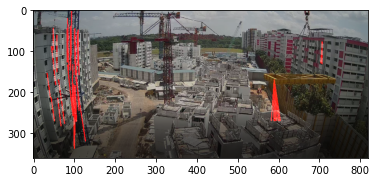

In [7]:
filename = "../MiDaS-master/test2.png"
img = cv2.imread(filename)
img = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img_gray = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)
if img is None:
    print ('Error opening image!')
    

blur_gray = cv2.GaussianBlur(img_gray,(5,5),0)
ret,blur_gray = cv2.threshold(blur_gray,50,255,cv2.THRESH_BINARY_INV) 
low_threshold = 20
high_threshold = 200
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 20  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

##### key in simulated hoist position #####
hoist_x = 590
hoist_y = 170

for line in lines:
    for x1,y1,x2,y2 in line:
        y_diff = y2 - y1
        x_diff = x2 - x1
        angle = math.atan(x_diff/y_diff)
        if (-10 /180) *  math.pi < angle < (10 /180) *  math.pi :

            point_x2 = int(100 * x_diff/y_diff) + hoist_x
            point_y2 = int(hoist_y + 100) 
             
            
            
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),2)
            cv2.line(line_image,(hoist_x,hoist_y),(point_x2,point_y2),(255,0,0),2)


lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
plt.imshow(lines_edges)